# MTRN4110 20T2 Lecture Vision I OpenCV Examples

# Pixels

## Import libraries

In [24]:
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting

## Accessing pixel values

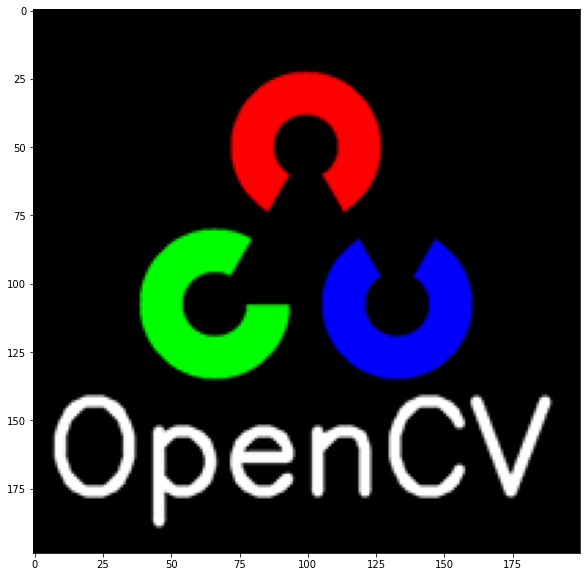

In [25]:
img = cv2.imread('opencv_logo.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # OpenCV reads an image in the BGR order by default, this function can change the order to RGB
plt.figure(figsize = (18, 10))
plt.imshow(img_rgb)
plt.show()

In [26]:
px_rgb = img_rgb[30, 100] # pixel value at row = 30, column = 100
print(px_rgb)

[255   0   0]


## Grayscale image

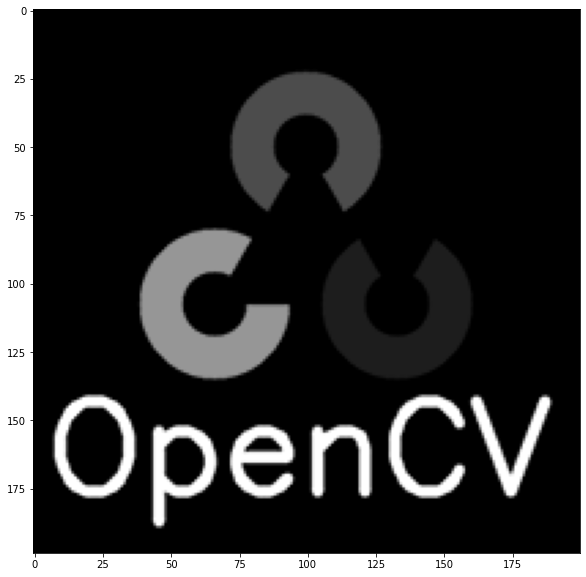

In [27]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Change the color image to a grayscale image
plt.figure(figsize = (18, 10))
plt.imshow(img_gray, cmap='gray')
plt.show()

In [28]:
px_gray = img_gray[30, 100] # pixel value at row = 30, column = 100
print(px_gray)

76


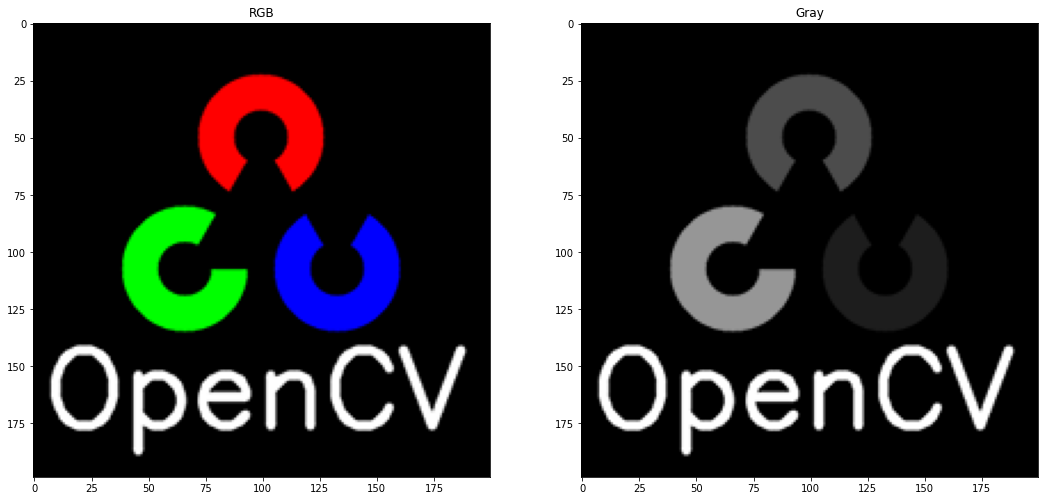

In [29]:
fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(img_rgb), ax1.set_title("RGB")
ax2.imshow(img_gray, cmap='gray'), ax2.set_title("Gray")
plt.show()

## Image ROI

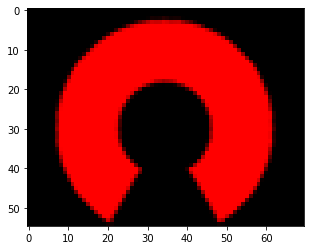

In [30]:
ROI = img_rgb[20:75, 65:135] # region of interest, rows: 20 - 75, columns: 65 - 135
plt.imshow(ROI)
plt.show()

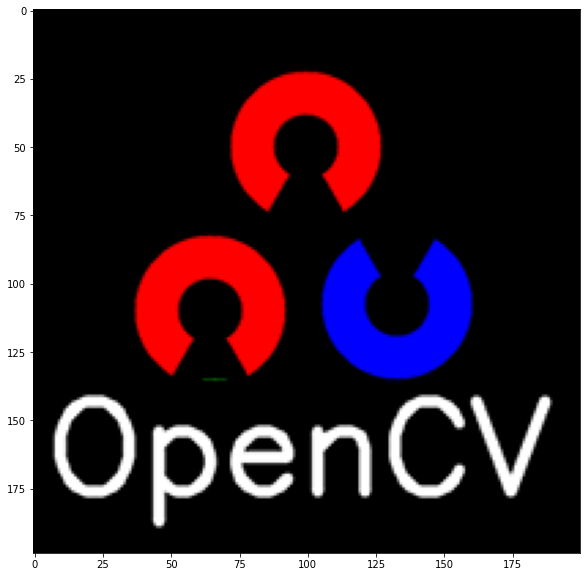

In [31]:
img_rgb[80:135, 30:100] = ROI # replace the area of rows: 80 - 135, columns: 30 - 100 with the ROI
plt.figure(figsize = (18, 10))
plt.imshow(img_rgb)
plt.show()

In [32]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # reset img_rgb

# Perspective transformations

[[ 1.05587376e+00  9.18151097e-02 -6.50969128e+01]
 [ 4.69010049e-02  1.12562412e+00 -7.57920240e+01]
 [ 1.83251448e-04  5.13337001e-04  1.00000000e+00]]


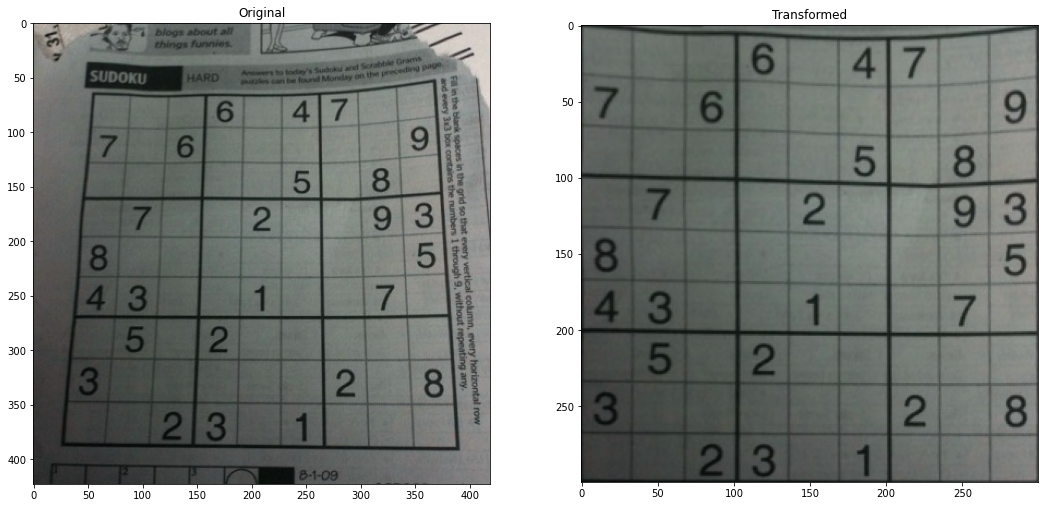

In [53]:
## Import libraries
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting

## Perspective tranformation
img = cv2.imread('sudoku.jpg') # read an image

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]]) # four points on the first image
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]]) # four points on the second image

H = cv2.getPerspectiveTransform(pts1,pts2) # homography matrix
print(H)

dst = cv2.warpPerspective(img, H, (300,300))

fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(img), ax1.set_title("Original")
ax2.imshow(dst), ax2.set_title("Transformed")
plt.show()

# Colour spaces

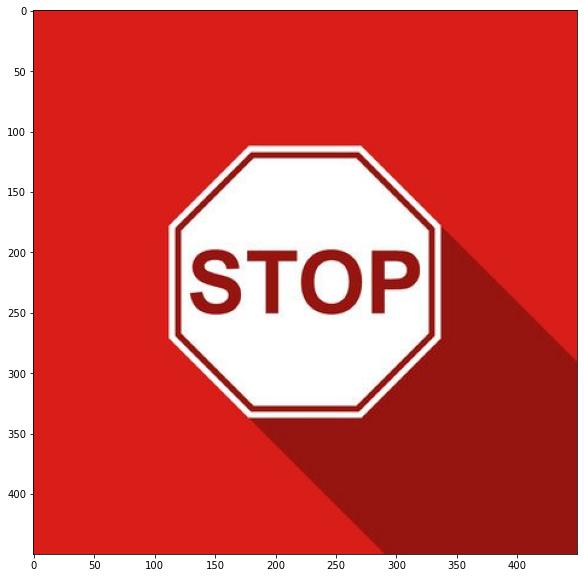

In [34]:
## Import libraries
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting

## Change Colour space to HSV
img = cv2.imread('stop_shadow.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # OpenCV reads an image in the BGR order by default, this function can change the order to RGB
plt.figure(figsize = (18, 10))
plt.imshow(img_rgb)
plt.show()

In [35]:
px_rgb = img_rgb[100, 100] # pixel value at row = 100, column = 100
print(px_rgb)
px_rgb = img_rgb[400, 400] # pixel value at row = 400, column = 400
print(px_rgb)

[217  30  25]
[150  21  16]


In [36]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # OpenCV reads an image in the BGR order by default, this function can change the order to RGB
px_hsv = img_hsv[100, 100] # pixel value at row = 100, column = 100
print(px_hsv)
px_hsv = img_hsv[400, 400] # pixel value at row = 400, column = 400
print(px_hsv)

[  1 226 217]
[  1 228 150]


# Thresholding

## Grayscale thresholding

In [37]:
# Import libraries
import cv2 
import numpy as np

def nothing(x): pass

# Load image
image = cv2.imread('opencv_logo.png')

# Create a window
cv2.namedWindow('image', cv2.WINDOW_NORMAL) 
cv2.resizeWindow('image', 900, 400)

# Create trackbars for thresholding
# Set thresh and maxval range from 0-255
cv2.createTrackbar('thresh', 'image', 0, 255, nothing) 
cv2.createTrackbar('maxval', 'image', 0, 255, nothing) 

# Set default value for thresh and maxval trackbars
cv2.setTrackbarPos('thresh', 'image', 0) 
cv2.setTrackbarPos('maxval', 'image', 255) 

# Initialize thresh and maxval values
thresh = maxval = 0 
pthresh = pmaxval = 0

while(1):

    # Get current positions of all trackbars
    thresh = cv2.getTrackbarPos('thresh', 'image')
    maxval = cv2.getTrackbarPos('maxval', 'image')

    # Convert to gray format and threshold
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, threshed = cv2.threshold(gray, thresh, maxval, cv2.THRESH_BINARY)
    
    # Convert grayscale image to color image for displaying simultaneous
    gray_3_channel = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    threshed_3_channel = cv2.cvtColor(threshed, cv2.COLOR_GRAY2BGR)
    
    # Stack images
    numpy_horizontal = np.hstack((image, gray_3_channel, threshed_3_channel))

    # Print if there is a change in threshold or maxval value
    if((pthresh != thresh) | (pmaxval != maxval)):
        print("(thresh = %d , maxval = %d)" % (thresh , maxval))
        pthresh = thresh
        pmaxval = maxval

    # Display stacked image, press q to quit
    cv2.imshow('image', numpy_horizontal)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

(thresh = 0 , maxval = 255)


## Colour-based thresholding

In [38]:
# Import libraries
import cv2 
import numpy as np

def nothing(x): pass

# Load image
image = cv2.imread('opencv_logo.png')

# Create a window
cv2.namedWindow('image', cv2.WINDOW_NORMAL) 
cv2.resizeWindow('image', 900, 700)

# Create trackbars for color change
# Hue is from 0-179 for Opencv
cv2.createTrackbar('HMin', 'image', 0, 179, nothing) 
cv2.createTrackbar('SMin', 'image', 0, 255, nothing) 
cv2.createTrackbar('VMin', 'image', 0, 255, nothing) 
cv2.createTrackbar('HMax', 'image', 0, 179, nothing) 
cv2.createTrackbar('SMax', 'image', 0, 255, nothing) 
cv2.createTrackbar('VMax', 'image', 0, 255, nothing)

# Set default value for Max HSV trackbars
cv2.setTrackbarPos('HMax', 'image', 179) 
cv2.setTrackbarPos('SMax', 'image', 255) 
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize HSV min/max values
hMin = sMin = vMin = hMax = sMax = vMax = 0 
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

while(1):

    # Get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin', 'image')
    sMin = cv2.getTrackbarPos('SMin', 'image')
    vMin = cv2.getTrackbarPos('VMin', 'image')
    hMax = cv2.getTrackbarPos('HMax', 'image')
    sMax = cv2.getTrackbarPos('SMax', 'image')
    vMax = cv2.getTrackbarPos('VMax', 'image')

    # Set minimum and maximum HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Convert to HSV format and color threshold
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(image, image, mask=mask)
    
    # Convert grayscale image to color image for displaying simultaneous
    mask_3_channel = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    
    # Stack images
    numpy_horizontal = np.hstack((image, result, mask_3_channel))
    
    # Display HSV values of some colours
    cv2.putText(numpy_horizontal, 'Black: (0, 0, 0)', (130, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,255), 1, cv2.LINE_AA)
    cv2.putText(numpy_horizontal, 'White: (0, 0, 255)', (130, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,255), 1, cv2.LINE_AA)
    cv2.putText(numpy_horizontal, 'Red: (0, 255, 255)', (130, 45), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,255), 1, cv2.LINE_AA)
    cv2.putText(numpy_horizontal, 'Green: (60, 255, 255)', (130, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,255), 1, cv2.LINE_AA)
    cv2.putText(numpy_horizontal, 'Blue: (120, 255, 255)', (130, 75), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,255), 1, cv2.LINE_AA)

    # Print if there is a change in HSV value
    if((phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display stacked image, press q to quit
    cv2.imshow('image', numpy_horizontal)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)


# Morphological transformations

## Import libraries

In [39]:
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting

## Prepare image and kernel

In [40]:
img = cv2.imread('fingerprint.png',cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3,3), np.uint8)

## Erosion

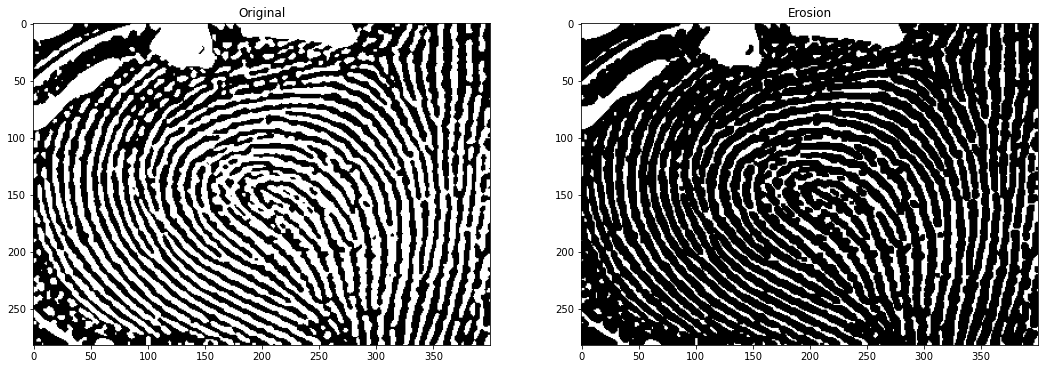

In [41]:
erosion = cv2.erode(img, kernel, iterations = 1)
fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(img, cmap='gray'), ax1.set_title("Original")
ax2.imshow(erosion, cmap='gray'), ax2.set_title("Erosion")
plt.show()

## Dilation

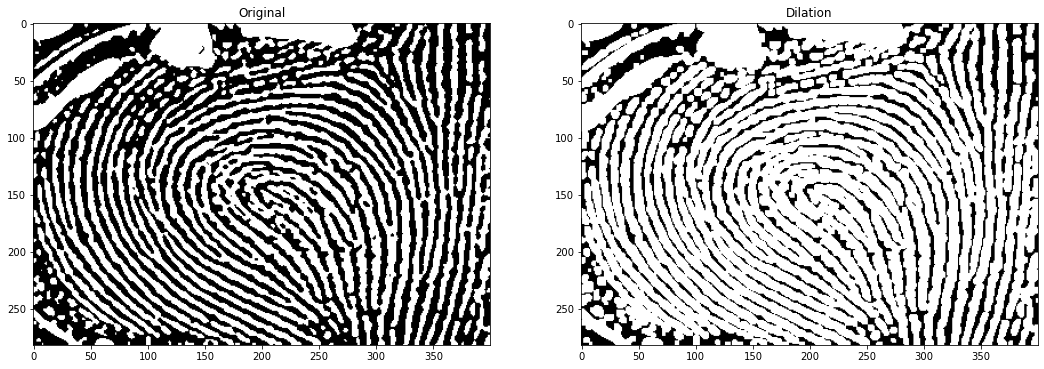

In [42]:
dilation = cv2.dilate(img, kernel, iterations = 1)
fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(img, cmap='gray'), ax1.set_title("Original")
ax2.imshow(dilation, cmap='gray'), ax2.set_title("Dilation")
plt.show()

## Opening

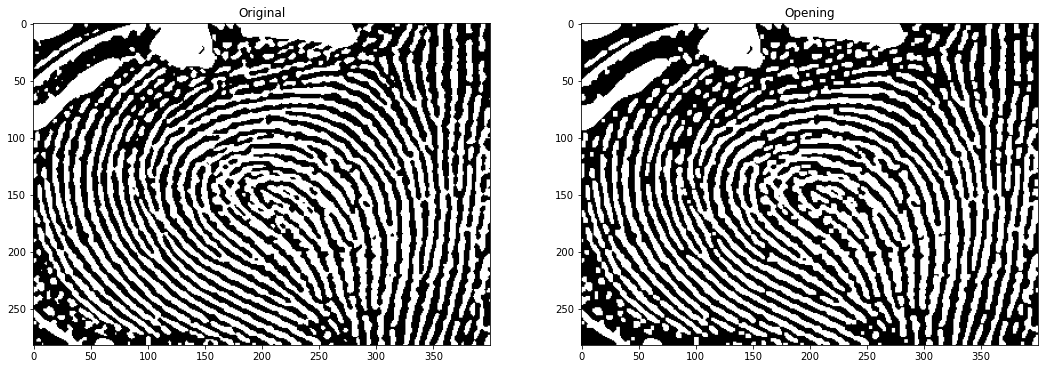

In [43]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(img, cmap='gray'), ax1.set_title("Original")
ax2.imshow(opening, cmap='gray'), ax2.set_title("Opening")
plt.show()

## Closing

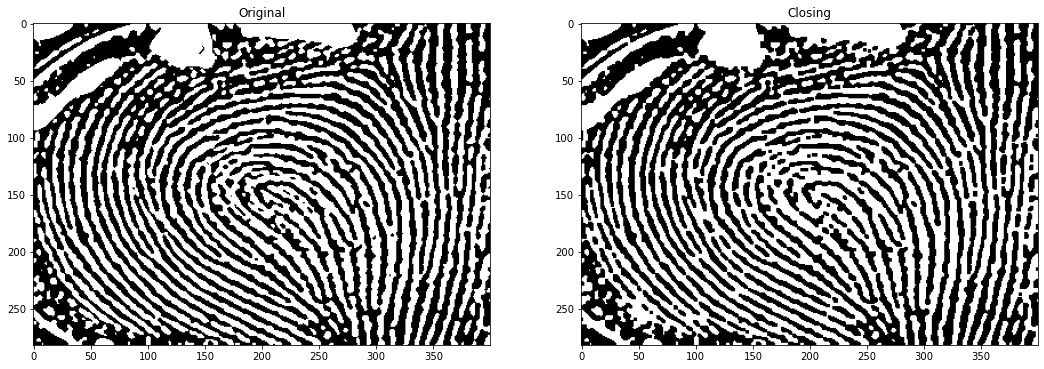

In [44]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(img, cmap='gray'), ax1.set_title("Original")
ax2.imshow(closing, cmap='gray'), ax2.set_title("Closing")
plt.show()

## Opening after Closing

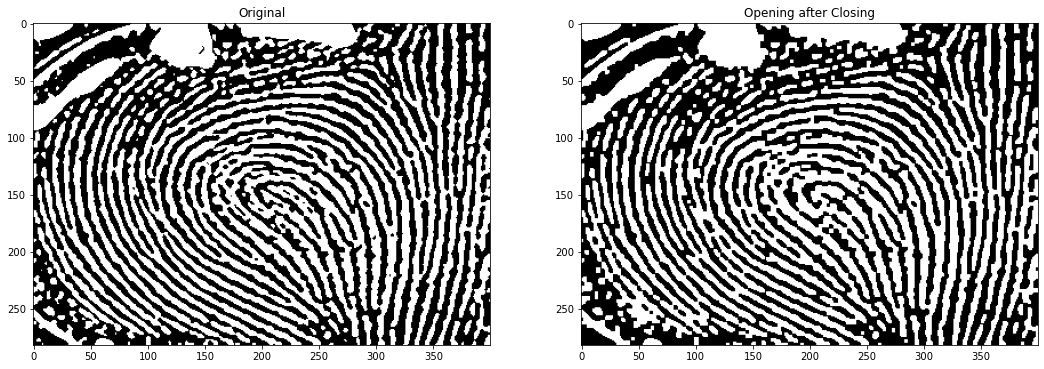

In [45]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(img, cmap='gray'), ax1.set_title("Original")
ax2.imshow(opening, cmap='gray'), ax2.set_title("Opening after Closing")
plt.show()

## Closing after Opening

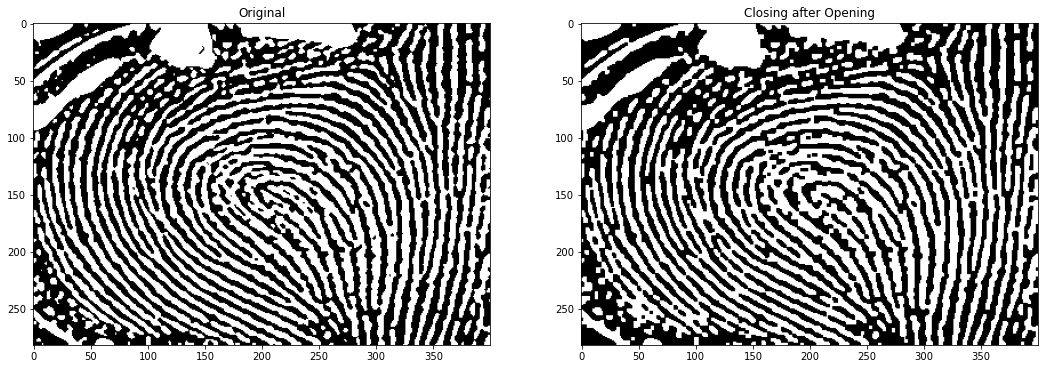

In [46]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(img, cmap='gray'), ax1.set_title("Original")
ax2.imshow(closing, cmap='gray'), ax2.set_title("Closing after Opening")
plt.show()

## Morphological Gradient

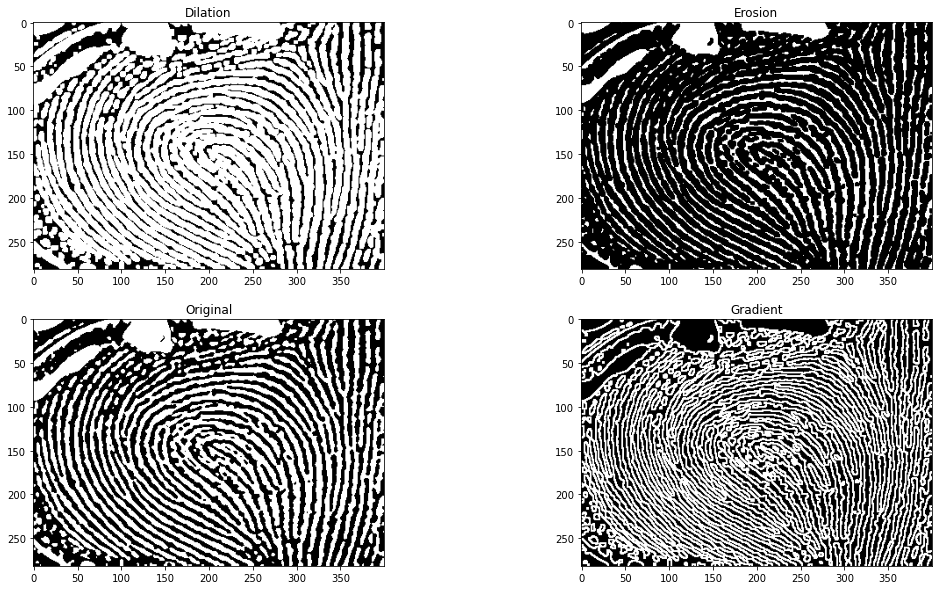

In [52]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

#plot the image
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize = (18, 10), nrows = 2, ncols = 2)
ax1.imshow(dilation, cmap='gray'), ax1.set_title("Dilation")
ax2.imshow(erosion, cmap='gray'), ax2.set_title("Erosion")
ax3.imshow(img, cmap='gray'), ax3.set_title("Original")
ax4.imshow(gradient, cmap='gray'), ax4.set_title("Gradient")
plt.show()